In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [25]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [151]:
len(X_train)

60000

In [29]:
len(X_test)

10000

In [31]:
X_test[0].shape

(28, 28)

In [33]:
X_train[4] #currently we have 2-D data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [81]:
plt.matshow(X_train[0])

In [85]:
y_train[0]

5

In [97]:
#We are dividing our array to sacle it b/c it will help us to increase the accuracy
X_train=X_train/255
X_test=X_test/255

In [99]:
#Converting 2-D data to 1-D

X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [101]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
#Creating a neural network
#"The value 10 represents the number of neurons in the output layer, which corresponds to the 
#10 possible classes (digits 0-9) in the MNIST dataset. During prediction, the model will output 
#values from each neuron, and the neuron with the highest output will indicate the predicted digit."
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [153]:
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9285 - loss: 0.2617
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9280 - loss: 0.2588
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.9281 - loss: 0.2566
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9335 - loss: 0.2457
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.9311 - loss: 0.2525


In [113]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.3019


[0.2647709250450134, 0.9275000095367432]

In [119]:
plt.matshow(X_test[0])

In [115]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5.3262472e-01, 5.4003778e-03, 9.9964529e-01, 2.7547735e-01,
       5.7004329e-10, 8.1772065e-01, 8.1036472e-01, 6.0490041e-13,
       1.2295094e-01, 2.8764255e-09], dtype=float32)

In [123]:
#"We get predictions in an array from the 10 neurons. Only one neuron has the highest output, 
#indicating the predicted digit. We use argmax to find this value, so np.argmax(y_predicted[1])
#shows that the predicted value is 2.
np.argmax(y_predicted[1])

2

In [125]:
#we need to convert our whole y_predicted to int (b/c currently the output is in form of neuron)
#basically we need this to create a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [127]:
y_predicted_labels[2]

1

In [139]:
#creating a confusion matrix 
cm = confusion_matrix(y_test, y_predicted_labels)
cm

array([[ 965,    0,    2,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    9,  935,   13,    7,    2,   11,   10,   33,    4],
       [   4,    0,   23,  921,    0,   21,    1,   11,   22,    7],
       [   1,    1,    8,    1,  916,    0,    8,    3,   10,   34],
       [  10,    2,    8,   34,    7,  779,   11,    4,   31,    6],
       [  15,    3,    9,    1,    7,   11,  907,    2,    3,    0],
       [   1,    6,   25,    7,    7,    1,    0,  940,    4,   37],
       [   8,    9,    8,   19,    9,   22,    8,    8,  877,    6],
       [  11,    7,    1,   11,   27,    7,    0,   14,    8,  923]],
      dtype=int64)

<Figure size 1000x700 with 0 Axes>

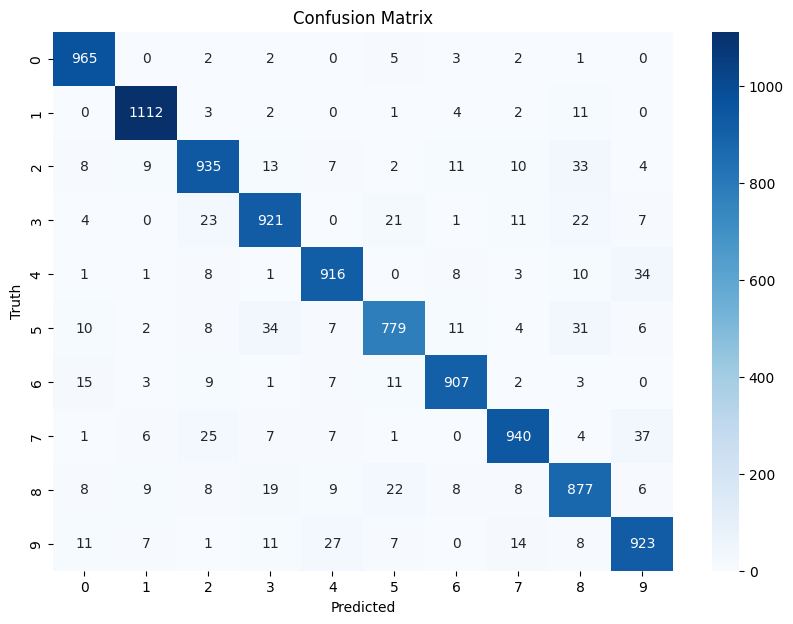

In [145]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()